In [1]:
!pip install -U kaleido

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido

In [3]:
# This data contains the details about consumers who purchased an EV
data = pd.read_csv("behavioural_dataset.csv")

In [4]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


Considering the performance disparities, choosing between petrol/diesel vehicles and EVs involves assessing factors like acceleration, range, efficiency, maintenance costs, environmental impact, and driving experience.

In [5]:
data.describe

<bound method NDFrame.describe of     Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       200000

In [6]:
pd.isnull(data).sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [7]:
data.rename(columns={'Personal loan':'Car_Loan','Price':'EV_Price'},inplace=True)

In [31]:
data.EV_Price.mean()

1194040.4040404041

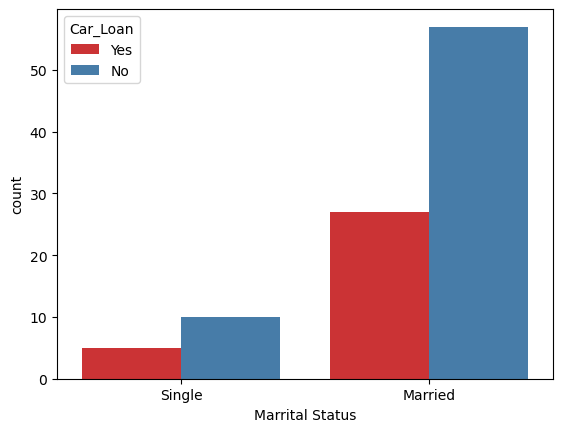

In [8]:
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = data, palette = 'Set1')
plt.show()

In [9]:
(data['Marrital Status'].value_counts()['Married'])/((data['Marrital Status'].value_counts()['Married'])+(data['Marrital Status'].value_counts()['Single']))*100

84.84848484848484

84 % people are married

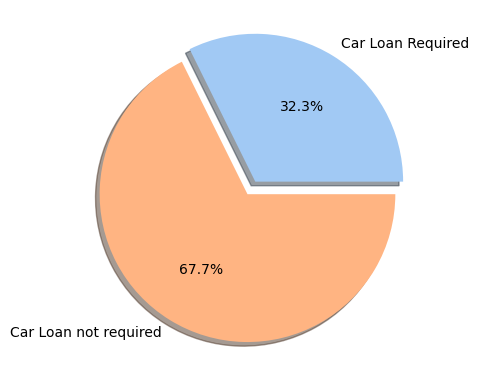

In [10]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [data.query('Car_Loan == "Yes"').Car_Loan.count(),data.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

/home/saikarthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/saikarthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/saikarthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/saikarthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

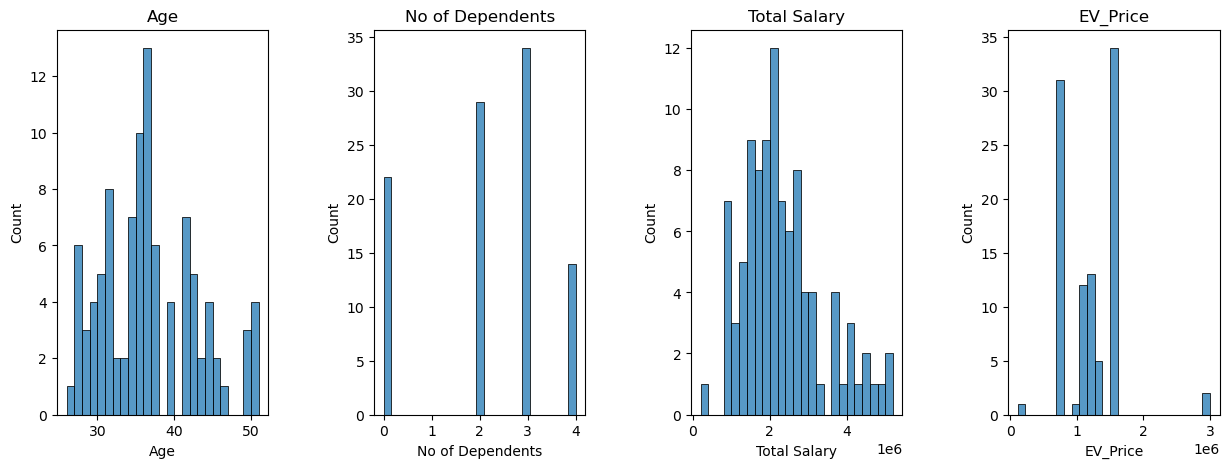

In [11]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [15]:
cluster_features = list(data.columns)
cluster_data = data[cluster_features].values
cluster_data[:, 0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [17]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

Decided to use Kmodes because of categorical dataset it helps by gathering from frequency distance metrics

In [23]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

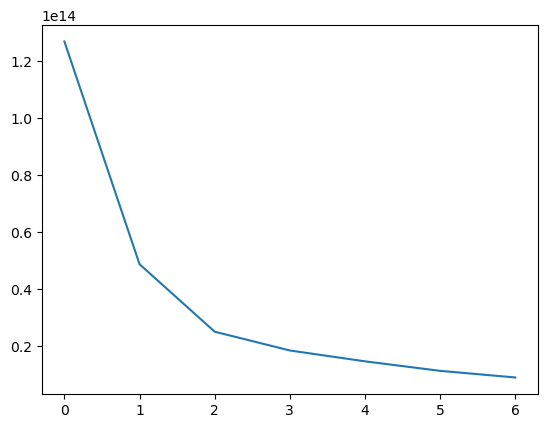

In [27]:
# Finding optimal number of clusters
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

Here we can see optimal number of K'th value is 2.

In [28]:
print(cost)

[126979657487180.34, 48777842651066.98, 25087753148183.234, 18491809410726.285, 14682459816808.33, 11342834153820.58, 9015320550594.115]


In [29]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 4, ncost: 48777842651066.98
Run: 1, iteration: 2/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 2/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 26, ncost: 59534589041758.66
Run: 3, iteration: 2/20, moves: 18, ncost: 50447073534650.24
Run: 3, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 3, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 13, ncost: 50256375135018.81
R

In [30]:
data['Cluster'] = clusters

In [34]:
data.Cluster.unique()

array([0, 1], dtype=uint16)

In [37]:
print("The Mean Ev price of Cluster 0 is :- \n\t",round(data.EV_Price[data.Cluster==0].mean(),2))
print("The Mean Ev price of Cluster 1 is :- \n\t",round(data.EV_Price[data.Cluster==1].mean(),2))

The Mean Ev price of Cluster 0 is :- 
	 1021267.61
The Mean Ev price of Cluster 1 is :- 
	 1632142.86


In [39]:
print("The Max Ev price of Cluster 0 is :- \n\t",round(data.EV_Price[data.Cluster==0].max(),2))
print("The Max Ev price of Cluster 1 is :- \n\t",round(data.EV_Price[data.Cluster==1].max(),2))

The Max Ev price of Cluster 0 is :- 
	 1600000
The Max Ev price of Cluster 1 is :- 
	 3000000


In [40]:
print("The Min Ev price of Cluster 0 is :- \n\t",round(data.EV_Price[data.Cluster==0].min(),2))
print("The Min Ev price of Cluster 1 is :- \n\t",round(data.EV_Price[data.Cluster==1].min(),2))

The Min Ev price of Cluster 0 is :- 
	 110000
The Min Ev price of Cluster 1 is :- 
	 1200000


In [42]:
data['Cluster'].value_counts(normalize=True) * 100

Cluster
0    71.717172
1    28.282828
Name: proportion, dtype: float64

In [45]:
data_cluster0 = data[data.Cluster==0]
data_cluster1 = data[data.Cluster==1]

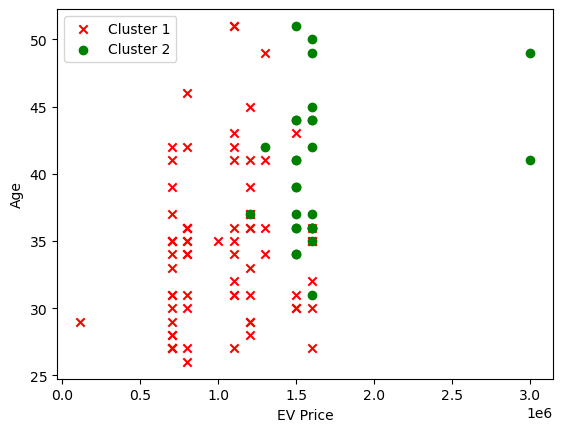

In [48]:
plt.scatter(data_cluster0.EV_Price, data_cluster0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(data_cluster1.EV_Price, data_cluster1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

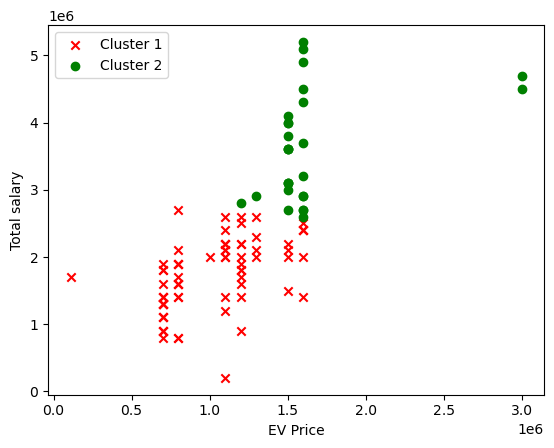

In [47]:
plt.scatter(data_cluster0.EV_Price, data_cluster0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(data_cluster1.EV_Price, data_cluster1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()


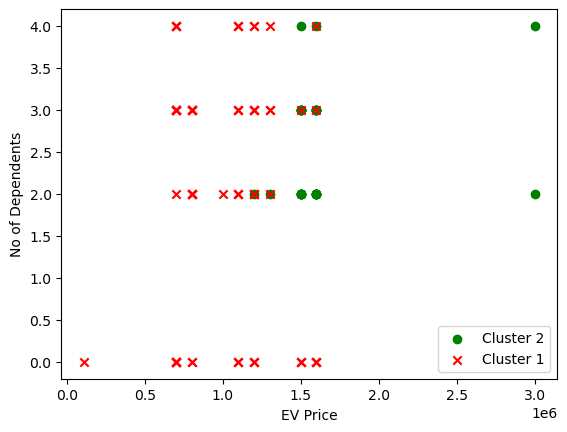

In [49]:
plt.scatter(data_cluster1.EV_Price, data_cluster1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(data_cluster0.EV_Price, data_cluster0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

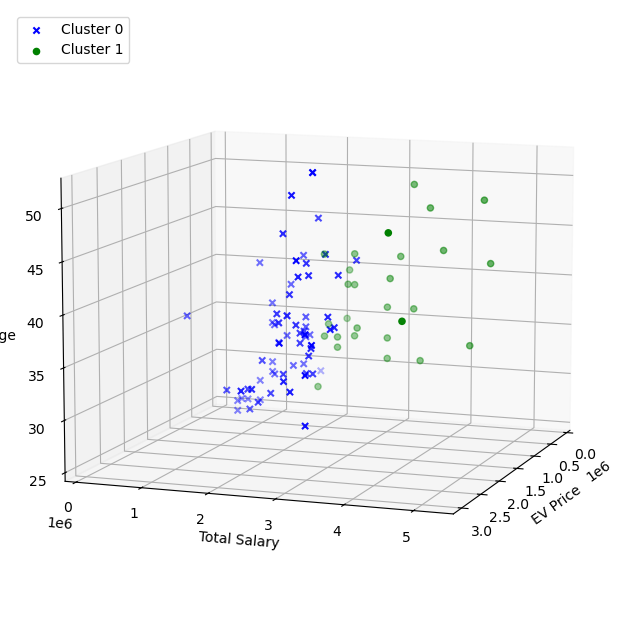

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_cluster0.EV_Price, data_cluster0['Total Salary'], data_cluster0['Age'], color='blue', marker = 'x', label = 'Cluster 0')
ax.scatter(data_cluster1.EV_Price, data_cluster1['Total Salary'],data_cluster1['Age'], color='green', label = 'Cluster 1')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

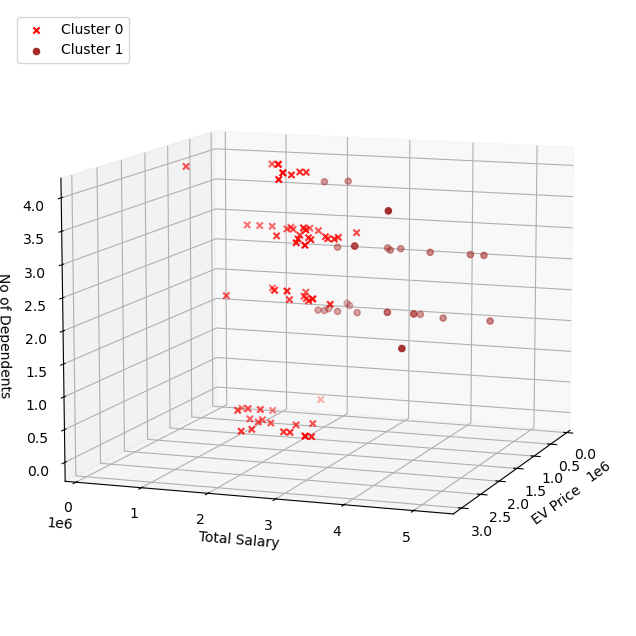

In [57]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_cluster0.EV_Price, data_cluster0['Total Salary'], data_cluster0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 0')
ax.scatter(data_cluster1.EV_Price, data_cluster1['Total Salary'],data_cluster1['No of Dependents'], color='brown', label = 'Cluster 1')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()